- pip install 은 패키지만 설치
- conda install 은 의존 관계에 있는 패키지까지 같이 설치

- GBM은 경사하강법 사용
- 학습이 더 이상 무의미할 때 Early Stopping 사용

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
# ensemble 위한 분류학습기 추가하기

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.preprocessing import LabelEncoder , OneHotEncoder , StandardScaler , MinMaxScaler , Binarizer 
from sklearn.model_selection import train_test_split , GridSearchCV

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score , roc_auc_score
from sklearn.metrics import confusion_matrix, precision_recall_curve , roc_curve

import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

from sklearn.datasets import load_breast_cancer
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# 데이터 로드
from sklearn.datasets import load_breast_cancer
dataset = load_breast_cancer()
# dataset.keys()
features = dataset.data
# features
label = dataset.target
# labels

# 전처리를 편하게 하기 위해 데이터프레임으로 변환
cancer_df = pd.DataFrame(data=features, columns=dataset.feature_names)
cancer_df['target'] = label

In [3]:
# 클래스의 분포 비율 확인
cancer_df['target'].value_counts()

1    357
0    212
Name: target, dtype: int64

In [4]:
X_train , X_test , y_train , y_test = train_test_split(features,
                                                                              label,
                                                                              test_size=0.2,
                                                                              random_state=100)

### XGBoost

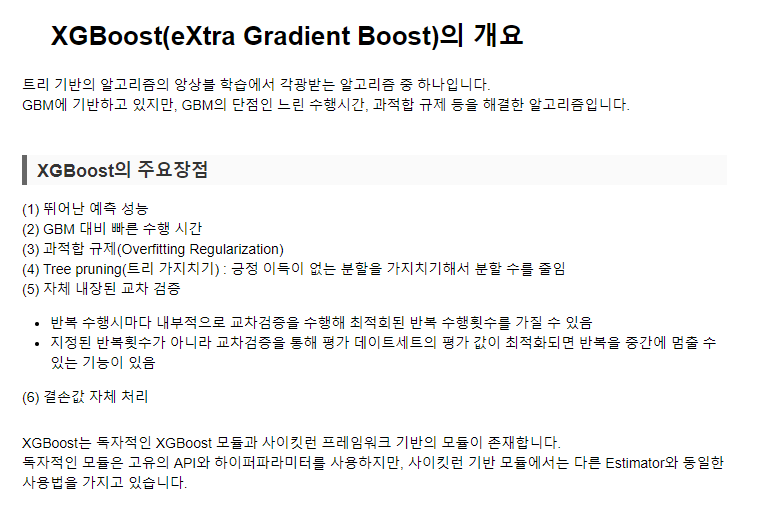

In [46]:
from IPython.display import Image
Image('/Users/HojinChoi/Desktop/data/XGBoost-01.png', width = 600)

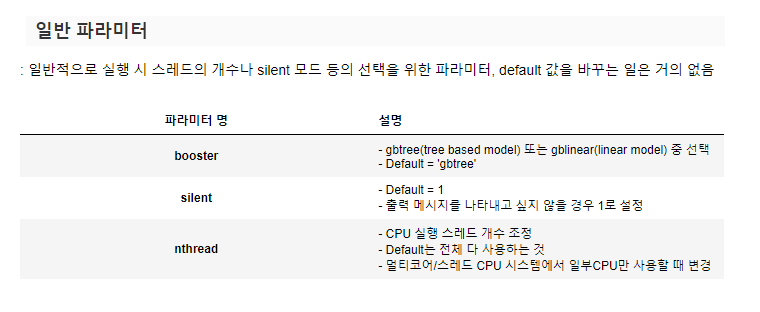

In [47]:
from IPython.display import Image
Image('/Users/HojinChoi/Desktop/data/XGBoost-02.png', width = 600)

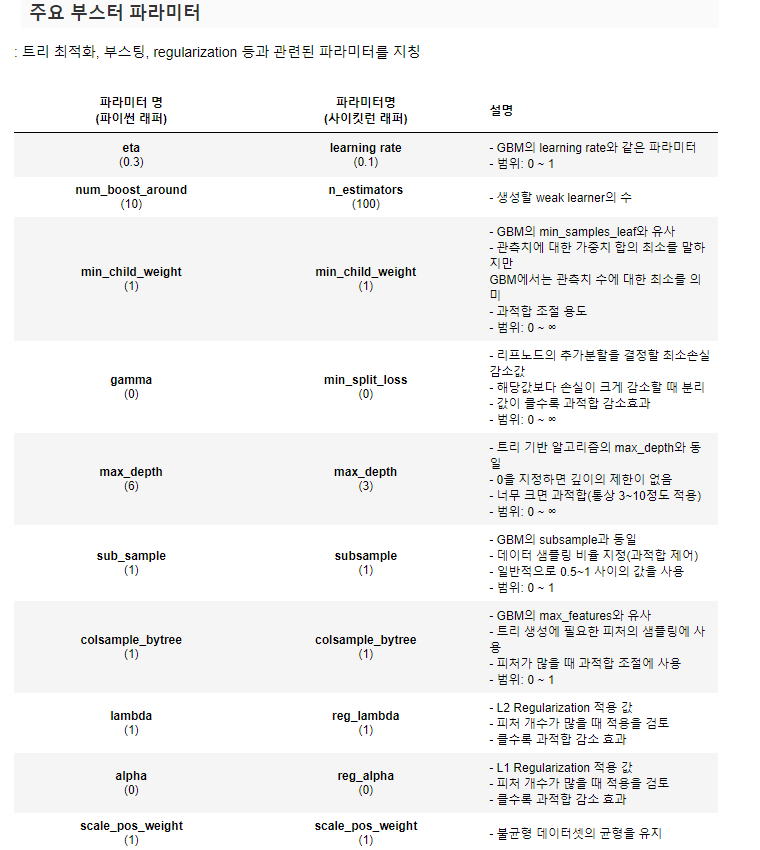

In [48]:
from IPython.display import Image
Image('/Users/HojinChoi/Desktop/data/XGBoost-03.png', width = 600)

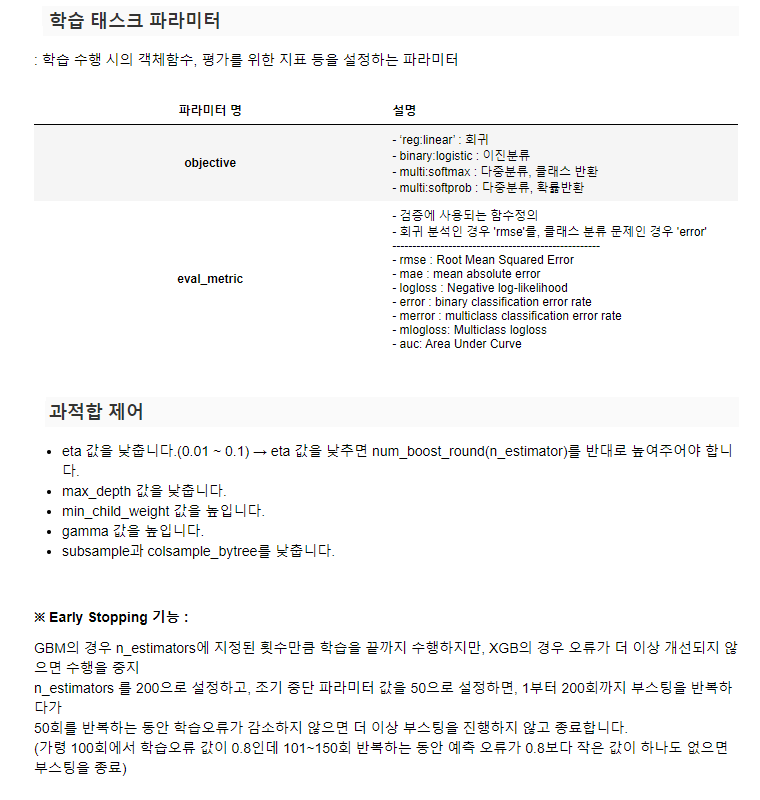

In [49]:
from IPython.display import Image
Image('/Users/HojinChoi/Desktop/data/XGBoost-04.png', width = 600)

In [5]:
from xgboost import XGBClassifier

In [6]:
sklearn_xgboost_model = XGBClassifier(n_estimators=400,
                                                                 learning_rate=0.1,
                                                                 max_depth=3)
sklearn_xgboost_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=400, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [7]:
y_pred = sklearn_xgboost_model.predict(X_test)

In [8]:
# 혼동행렬 , 정확도 , 정밀도 , 재현율 , F1 , AUC 확인까지

def classifier_eval(y_test , y_pred) :
    print('오차행렬\ : ' , confusion_matrix(y_test, y_pred))
    print('정확도 : ' , accuracy_score(y_test, y_pred))
    print('정밀도 : ' , precision_score(y_test, y_pred))
    print('재현율 : ' , recall_score(y_test, y_pred))
    print('F1 : ' , f1_score(y_test, y_pred))
    print('AUC : ' , roc_auc_score(y_test, y_pred))

In [9]:
classifier_eval(y_test , y_pred)

오차행렬\ :  [[46  3]
 [ 1 64]]
정확도 :  0.9649122807017544
정밀도 :  0.9552238805970149
재현율 :  0.9846153846153847
F1 :  0.9696969696969696
AUC :  0.9616954474097332


In [10]:
# 튜닝
sklearn_xgboost_model = XGBClassifier(n_estimators=400,
                                                             learning_rate=0.1,
                                                             max_depth=3)
sklearn_xgboost_model.fit(X_train , y_train ,
                                         early_stopping_rounds=100,
                                         eval_metric='logloss',  #오류에 대한 평가성능지표 리턴 함수
                                         eval_set = [(X_test , y_test)],
                                         verbose = True)

[0]	validation_0-logloss:0.61460
Will train until validation_0-logloss hasn't improved in 100 rounds.
[1]	validation_0-logloss:0.55405
[2]	validation_0-logloss:0.49816
[3]	validation_0-logloss:0.44858
[4]	validation_0-logloss:0.40558
[5]	validation_0-logloss:0.37227
[6]	validation_0-logloss:0.34175
[7]	validation_0-logloss:0.31699
[8]	validation_0-logloss:0.29199
[9]	validation_0-logloss:0.27386
[10]	validation_0-logloss:0.25490
[11]	validation_0-logloss:0.23818
[12]	validation_0-logloss:0.22577
[13]	validation_0-logloss:0.21225
[14]	validation_0-logloss:0.20156
[15]	validation_0-logloss:0.19251
[16]	validation_0-logloss:0.18292
[17]	validation_0-logloss:0.17663
[18]	validation_0-logloss:0.17008
[19]	validation_0-logloss:0.16260
[20]	validation_0-logloss:0.15747
[21]	validation_0-logloss:0.15208
[22]	validation_0-logloss:0.14877
[23]	validation_0-logloss:0.14609
[24]	validation_0-logloss:0.14465
[25]	validation_0-logloss:0.14215
[26]	validation_0-logloss:0.13825
[27]	validation_0-loglo

[236]	validation_0-logloss:0.09308
[237]	validation_0-logloss:0.09292
[238]	validation_0-logloss:0.09305
[239]	validation_0-logloss:0.09291
[240]	validation_0-logloss:0.09316
[241]	validation_0-logloss:0.09301
[242]	validation_0-logloss:0.09287
[243]	validation_0-logloss:0.09301
[244]	validation_0-logloss:0.09292
[245]	validation_0-logloss:0.09292
Stopping. Best iteration:
[145]	validation_0-logloss:0.09249



XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=400, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [11]:
y_pred145 = sklearn_xgboost_model.predict(X_test)
classifier_eval(y_test , y_pred145)

오차행렬\ :  [[47  2]
 [ 1 64]]
정확도 :  0.9736842105263158
정밀도 :  0.9696969696969697
재현율 :  0.9846153846153847
F1 :  0.9770992366412214
AUC :  0.9718995290423862


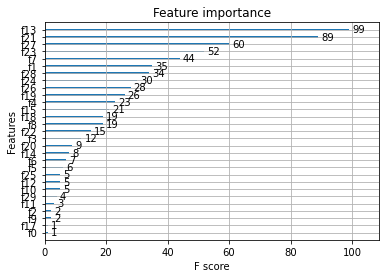

In [12]:
# 피처 중요도 시각화
from xgboost import plot_importance
plot_importance(sklearn_xgboost_model)

## 스태킹(Stacking)

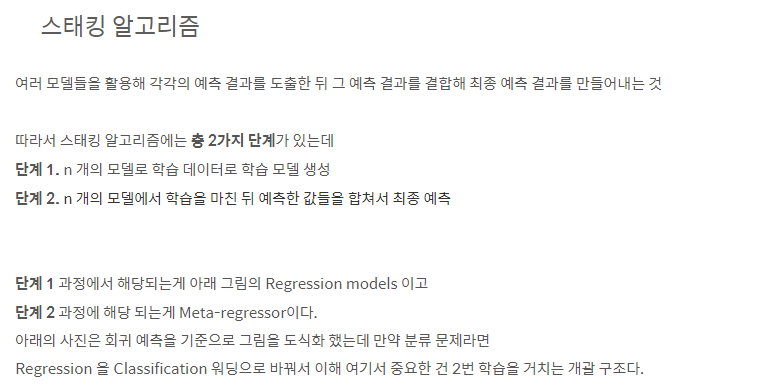

In [50]:
from IPython.display import Image
Image('/Users/HojinChoi/Desktop/data/ensemble-stacking-01.png', width = 600)

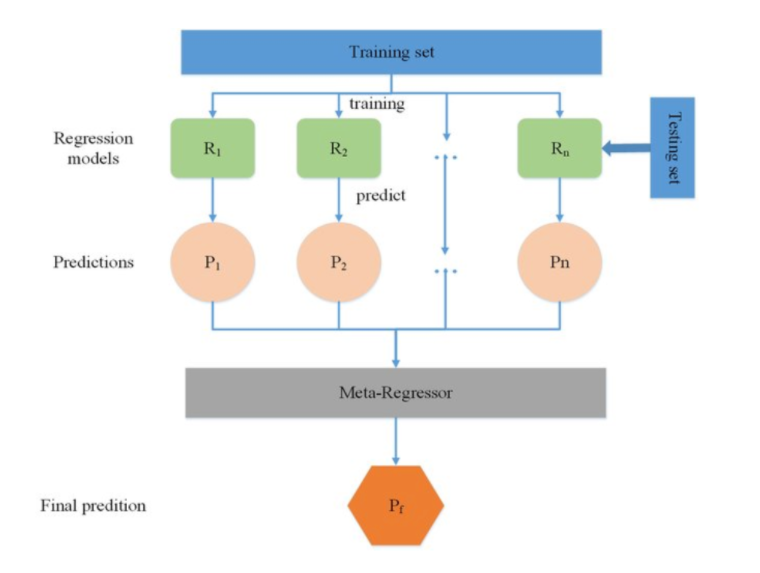

In [51]:
from IPython.display import Image
Image('/Users/HojinChoi/Desktop/data/ensemble-stacking-02.png', width = 600)

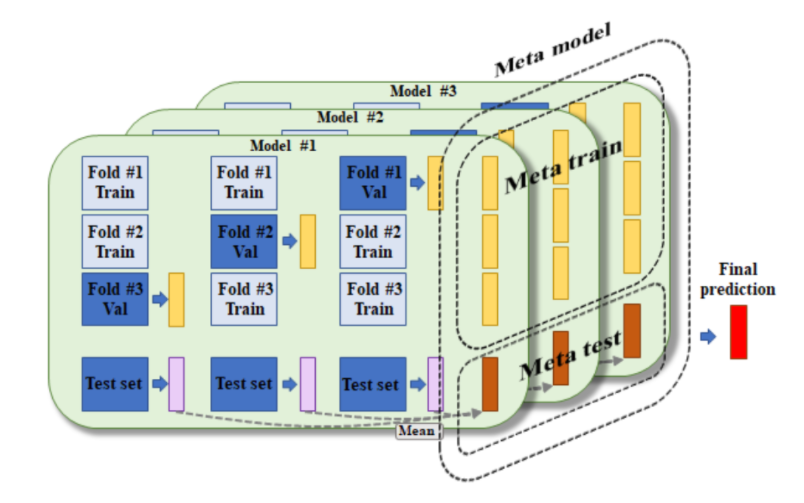

In [52]:
from IPython.display import Image
Image('/Users/HojinChoi/Desktop/data/ensemble-stacking-03.png', width = 600)

In [13]:
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [14]:
# 개별 분류기 생성
knn_clf = KNeighborsClassifier(n_neighbors=4)
rf_clf = RandomForestClassifier(n_estimators=100 , random_state=100)
dt_clf = DecisionTreeClassifier(random_state=100)
ada_clf = AdaBoostClassifier(n_estimators=100)

In [15]:
# 개별 모델에 대한 학습
knn_clf.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)
dt_clf.fit(X_train, y_train)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100)

In [16]:
# 개별 모델에 대한 예측 수행
knn_pred = knn_clf.predict(X_test)
rf_pred = rf_clf.predict(X_test)
dt_pred = dt_clf.predict(X_test)
ada_pred = ada_clf.predict(X_test)

In [17]:
classifier_eval(y_test, knn_pred)
classifier_eval(y_test, rf_pred)
classifier_eval(y_test, dt_pred)
classifier_eval(y_test, ada_pred)

오차행렬\ :  [[48  1]
 [ 5 60]]
정확도 :  0.9473684210526315
정밀도 :  0.9836065573770492
재현율 :  0.9230769230769231
F1 :  0.9523809523809524
AUC :  0.9513343799058084
오차행렬\ :  [[45  4]
 [ 1 64]]
정확도 :  0.956140350877193
정밀도 :  0.9411764705882353
재현율 :  0.9846153846153847
F1 :  0.962406015037594
AUC :  0.95149136577708
오차행렬\ :  [[45  4]
 [ 2 63]]
정확도 :  0.9473684210526315
정밀도 :  0.9402985074626866
재현율 :  0.9692307692307692
F1 :  0.9545454545454547
AUC :  0.9437990580847724
오차행렬\ :  [[46  3]
 [ 1 64]]
정확도 :  0.9649122807017544
정밀도 :  0.9552238805970149
재현율 :  0.9846153846153847
F1 :  0.9696969696969696
AUC :  0.9616954474097332


In [18]:
# 학습을 마친 모델의 예측 결과를 합쳐 최종 예측
merge_pred = np.array( [knn_pred, rf_pred, dt_pred, ada_pred] )
merge_pred

array([[0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
        0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
        1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
        0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
        0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
        0, 1, 0, 1],
       [0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
        0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
        1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
        0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
        0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        0, 1, 0, 1],
       [0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
        1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,

In [19]:
merge_pred = np.transpose(merge_pred)
merge_pred

array([[0, 0, 0, 0],
       [1, 1, 1, 1],
       [0, 0, 0, 0],
       [1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [1, 1, 1, 1],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1],
       [0, 0, 0, 1],
       [1, 1, 1, 1],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 0],
       [1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 0],
       [1, 1, 1, 1],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [1, 1, 1, 1],
       [1, 1, 1, 1],
       [0, 0, 0, 0],
       [1, 1, 1, 1],
       [0, 0, 0, 0],
       [1, 1, 0, 1],
       [1, 1,

In [20]:
# 최종 분류기 선택 , MetaModel 생성
lr_clf = LogisticRegression()
lr_clf.fit(merge_pred , y_test)
final_pred = lr_clf.predict(merge_pred)
classifier_eval(y_test , final_pred)


오차행렬\ :  [[48  1]
 [ 1 64]]
정확도 :  0.9824561403508771
정밀도 :  0.9846153846153847
재현율 :  0.9846153846153847
F1 :  0.9846153846153847
AUC :  0.9821036106750393


In [21]:
# 과적합(overfitting) 보완을 위해 교차 검증을 추가해야 한다.
# CV 세트를 기반으로 코드 변경
# 회귀 모델의 평가 지표로 활용되는 MAE() 
# Mean of Absolute Errors , 실제값과 예측 값의 차이를 절대값으로 변환한 평균

In [22]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

In [24]:
def get_stacking_base_datasets(model, X_train_n, y_train_n, X_test_n, n_folds ):
    # 지정된 n_folds값으로 KFold 생성.
    kf = KFold(n_splits=n_folds, shuffle=False, random_state=0)
    #추후에 메타 모델이 사용할 학습 데이터 반환을 위한 넘파이 배열 초기화 
    train_fold_pred = np.zeros((X_train_n.shape[0] ,1 ))
    test_pred = np.zeros((X_test_n.shape[0],n_folds))
    print(model.__class__.__name__ , ' model 시작 ')
    
    for folder_counter , (train_index, valid_index) in enumerate(kf.split(X_train_n)):
        #입력된 학습 데이터에서 기반 모델이 학습/예측할 폴드 데이터 셋 추출 
        print('\t 폴드 세트: ',folder_counter,' 시작 ')
        X_tr = X_train_n[train_index] 
        y_tr = y_train_n[train_index] 
        X_te = X_train_n[valid_index]  
        
        #폴드 세트 내부에서 다시 만들어진 학습 데이터로 기반 모델의 학습 수행.
        model.fit(X_tr , y_tr)       
        #폴드 세트 내부에서 다시 만들어진 검증 데이터로 기반 모델 예측 후 데이터 저장.
        train_fold_pred[valid_index, :] = model.predict(X_te).reshape(-1,1)
        #입력된 원본 테스트 데이터를 폴드 세트내 학습된 기반 모델에서 예측 후 데이터 저장. 
        test_pred[:, folder_counter] = model.predict(X_test_n)
            
    # 폴드 세트 내에서 원본 테스트 데이터를 예측한 데이터를 평균하여 테스트 데이터로 생성 
    test_pred_mean = np.mean(test_pred, axis=1).reshape(-1,1)    
    
    #train_fold_pred는 최종 메타 모델이 사용하는 학습 데이터, test_pred_mean은 테스트 데이터
    return train_fold_pred , test_pred_mean

In [29]:
# cv 적용 모델의 데이터 세트 리턴
knn_train , knn_test = get_stacking_base_datasets(knn_clf , X_train , y_train , X_test , 5) #5개의 폴드 세트 설정
rf_train , rf_test = get_stacking_base_datasets(rf_clf , X_train , y_train , X_test , 5) 
dt_train , dt_test = get_stacking_base_datasets(dt_clf , X_train , y_train , X_test , 5) 
ada_train , ada_test = get_stacking_base_datasets(ada_clf , X_train , y_train , X_test , 5) 

KNeighborsClassifier  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
RandomForestClassifier  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
DecisionTreeClassifier  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
AdaBoostClassifier  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 


In [37]:
# stacking_train
stacking_train = np.concatenate((knn_train, rf_train, dt_train, ada_train) , axis=1) #결합 함수
# stacking_test
stacking_test = np.concatenate((knn_test, rf_test, dt_test, ada_test) , axis=1)

In [40]:
print(len(X_train))
print(len(y_train))
# 메타 모델 학습
lr_clf.fit(stacking_train , y_train)
stacking_pred = lr_clf.predict(stacking_test)
classifier_eval(y_test , stacking_pred)

455
455
오차행렬\ :  [[48  1]
 [ 1 64]]
정확도 :  0.9824561403508771
정밀도 :  0.9846153846153847
재현율 :  0.9846153846153847
F1 :  0.9846153846153847
AUC :  0.9821036106750393
